In [1]:
# 📚 Basic Libraries
import numpy as np
import pandas as pd
import math

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🛠️ Ignore warnings (optional, for cleaner output)
import warnings
warnings.filterwarnings('ignore')

# 📢 Status
print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# 📂 Load Dataset
df = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')  # Path for Kaggle environment


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

📑 Feature Description:
CRIM: Crime rate per capita.

ZN: Proportion of residential land zoned for large lots.

INDUS: Proportion of non-retail business land.

CHAS: Charles River dummy variable (1 = bounds river).

NOX: Nitric oxide concentration (pollution).

RM: Average number of rooms per dwelling.

AGE: % of houses built before 1940.

DIS: Weighted distance to job centers.

RAD: Accessibility to radial highways.

TAX: Property tax rate per $10,000.

PTRATIO: Student-teacher ratio by town.

B: Related to proportion of Black residents.

LSTAT: % lower status of the population.

MEDV: Median value of homes (target).

In [5]:
# 📏 Check shape
print(f"Dataset Shape: {df.shape}")

# 📊 Descriptive Statistics
print("\n📊 Descriptive Statistics:")
display(df.describe())


# 🏷️ Data Types
print("\n🏷️ Data Types:")
display(df.dtypes)

# Data info
print(df.info())


Dataset Shape: (506, 14)

📊 Descriptive Statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



🏷️ Data Types:


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


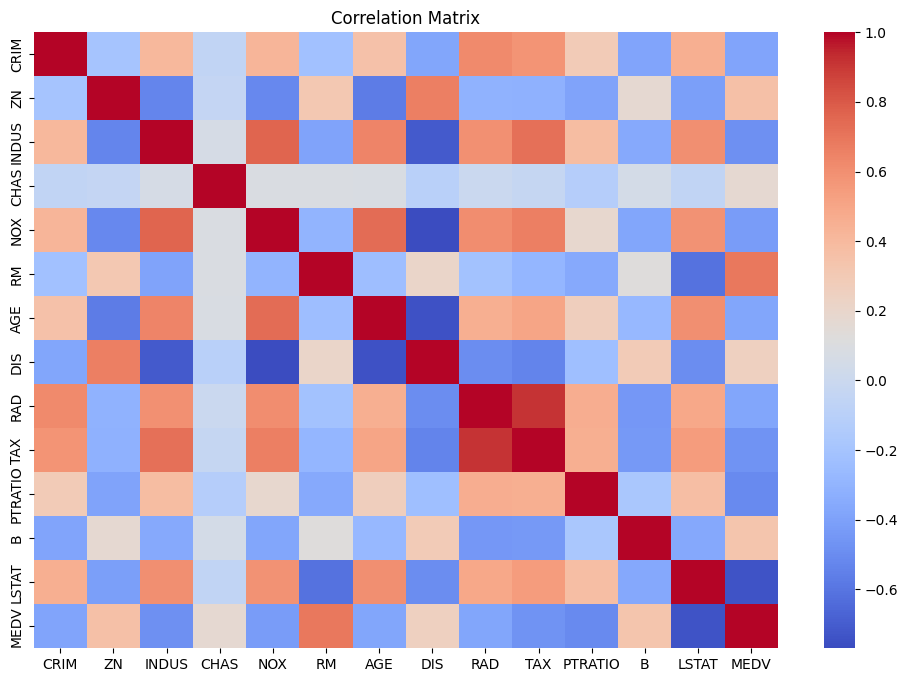

In [6]:
# 📈 Correlation Matrix (Optional Early Insight)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# preprocess

In [7]:
# 🎯 Separate features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# 🧹 Normalize features (Min-Max Scaling)
X_normalized = (X - X.min()) / (X.max() - X.min())

# 📈 Check after normalization
print("\nNormalized Features Preview:")
display(X_normalized.head())

print("\nTarget Preview:")
display(y.head())



Normalized Features Preview:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338



Target Preview:


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# 📚 Linear Regression - Formulas and Definitions

---

## 📌 What is Linear Regression?

Linear Regression is a **supervised learning algorithm** used to **predict a continuous value** (e.g., house price) by finding the **best-fit straight line** through the data points.

---

## ✍️ Basic Linear Equation

$$
Y_i = a + bX_i
$$

- \( Y_i \): Predicted value  
- \( X_i \): Input feature value  
- \( b \): Slope (weight/importance of feature)  
- \( a \): Intercept (bias/start point)  

---

## 📏 Prediction Function

$$
\hat{y} = Xw + b
$$

- \( \hat{y} \): Predicted output vector  
- \( X \): Feature matrix  
- \( w \): Weights vector  
- \( b \): Bias scalar  

---

## 🎯 Cost Function (MSE - Mean Squared Error)

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Measures **average squared difference** between actual and predicted values.  
- Lower MSE = Better model.

---

## 📈 Gradients (for Optimization)

- **Gradient with respect to weights (w):**

$$
\frac{\partial MSE}{\partial w} = -\frac{2}{n} X^T (y - \hat{y})
$$

- **Gradient with respect to bias (b):**

$$
\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum (y - \hat{y})
$$

---

## 🔄 Update Rules (Gradient Descent)

$$
w = w - \alpha \times \frac{\partial MSE}{\partial w}
$$

$$
b = b - \alpha \times \frac{\partial MSE}{\partial b}
$$

- \( \alpha \): Learning Rate (controls size of step during update)

---

## 📊 Evaluation Metrics

### 🔹 RMSE (Root Mean Squared Error)

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- Measures **average prediction error** magnitude.

---

### 🔹 R² Score (Coefficient of Determination)

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- \( \bar{y} \): Mean of actual values  
- Explains **how much variance** in the target variable is captured by the model.

---

## 🧠 Key Terms:

| Term | Meaning |
|:----|:--------|
| Weight (w) | How much a feature influences the output |
| Bias (b) | Starting point of prediction |
| Prediction (\( \hat{y} \)) | Estimated output value |
| Error | Difference between actual and predicted value |
| Cost Function | How wrong the model is |
| Gradient | Direction and rate of fastest error increase |
| Gradient Descent | Method to minimize the cost step-by-step |
| Learning Rate (\( \alpha \)) | How big the step size is while moving towards minimum error |
| Epoch | One full update cycle over the entire dataset |

---

✅ These concepts and formulas are the **foundation of machine learning regression models**!

---


## Initialize the weights

In [8]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)  # 0 weights for each feature
    bias = 0  # 0 bias
    return weights, bias

## prediction function

In [9]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

## Compute Cost (MSE)

In [10]:
def compute_cost(y_true, y_pred):
    n = len(y_true)
    cost = (1/n) * np.sum((y_true - y_pred) ** 2)
    return cost

## Gradient Descent Function

In [11]:
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    n = len(y)
    cost_history = []  # 🆕 Initialize empty list to track costs
    
    for epoch in range(epochs):
        y_pred = predict(X, weights, bias)
        
        # Gradients
        dw = -(2/n) * np.dot(X.T, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Track and store cost
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)
        
        # Optionally print cost
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")
    
    return weights, bias, cost_history


## RMSE Metric

In [12]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## R² Score Metric

In [13]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

## Training

In [14]:
# 🚀 Initialize
weights, bias = initialize_weights(X_normalized.shape[1])

# 🚀 Train
weights, bias, cost_history  = gradient_descent(X_normalized.values, y.values, weights, bias, learning_rate=0.01, epochs=1000)

# 🚀 Predict
y_pred = predict(X_normalized.values, weights, bias)

# 🚀 Evaluate
print("\n📈 Evaluation Metrics for Linear Regression:")
print(f"RMSE: {rmse(y.values, y_pred)}")
print(f"R² Score: {r2_score(y.values, y_pred)}")


Epoch 0: Cost = 592.1469169960475
Epoch 100: Cost = 72.27768118491781
Epoch 200: Cost = 55.721220018879315
Epoch 300: Cost = 48.961355403395025
Epoch 400: Cost = 45.03251816174511
Epoch 500: Cost = 42.14861534702771
Epoch 600: Cost = 39.809014939164754
Epoch 700: Cost = 37.84063571715211
Epoch 800: Cost = 36.16049842631291
Epoch 900: Cost = 34.71546535456159

📈 Evaluation Metrics for Linear Regression:
RMSE: 5.784968831333122
R² Score: 0.6035768736145914


### 🧮 Training and Evaluation Summary

- The model’s training loss (MSE) reduced significantly, from an initial cost of **592.14** to **34.71** after 1000 epochs.
- A final **RMSE of 5.78** indicates the model’s predictions are close to the true house prices, on average within \$5,780.
- The achieved **R² Score of 0.60** shows that the model explains approximately **60%** of the variability in the target house prices.


### 📈 Actual vs Predicted Prices

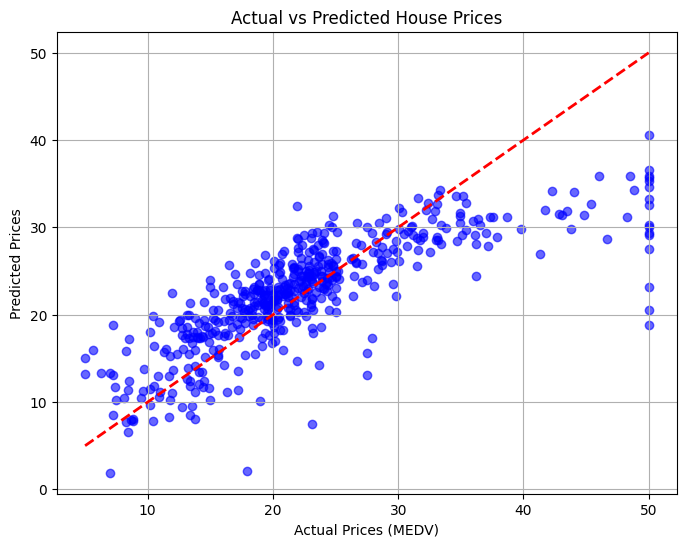

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices (MEDV)')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


The scatter plot shows how close the predicted house prices are to the actual values. Ideally, points should lie near the red dashed line (perfect prediction line).


### 📉 Cost Reduction Over Epochs

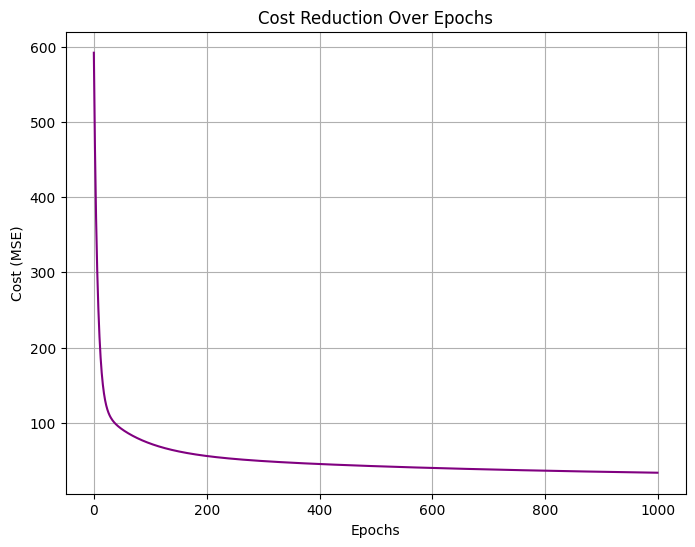

In [16]:
# 📉 Cost vs Epoch Plot (Optional)

plt.figure(figsize=(8,6))
plt.plot(range(len(cost_history)), cost_history, color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction Over Epochs')
plt.grid(True)
plt.show()


This plot shows how the model's cost (MSE) decreases with each training epoch, indicating that the model is learning and improving its predictions over time.


### 🌳 Random Forest Regression

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and reduce overfitting.  
It is more powerful than a single model like Linear Regression, especially when handling complex, non-linear relationships in the data.


DecisionTree

In [17]:
import numpy as np

# 🌳 Decision Tree Regressor from Scratch
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)

    def best_split(self, X, y):
        best_mse = float('inf')
        best_idx = None
        best_split = None
        
        n_samples, n_features = X.shape
        
        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            possible_splits = np.unique(feature_values)
            
            for split in possible_splits:
                left_mask = feature_values <= split
                right_mask = feature_values > split
                
                if sum(left_mask) == 0 or sum(right_mask) == 0:
                    continue  # Skip invalid splits
                
                left_y = y[left_mask]
                right_y = y[right_mask]
                
                current_mse = (len(left_y) * self.mse(left_y) + len(right_y) * self.mse(right_y)) / n_samples
                
                if current_mse < best_mse:
                    best_mse = current_mse
                    best_idx = feature_idx
                    best_split = split
        
        return best_idx, best_split

    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        
        if (depth >= self.max_depth) or (n_samples < self.min_samples_split):
            return {'value': np.mean(y)}  # Return a leaf node

        best_feature, best_split = self.best_split(X, y)
        
        if best_feature is None:
            return {'value': np.mean(y)}  # No valid split found

        left_mask = X[:, best_feature] <= best_split
        right_mask = X[:, best_feature] > best_split

        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': best_feature,
            'split': best_split,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if 'value' in tree:
            return tree['value']

        feature_value = sample[tree['feature']]
        if feature_value <= tree['split']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])


In [18]:
# 🌳 Random Forest Regressor from Scratch
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        
        for _ in range(self.n_estimators):
            # Bootstrap Sampling (with replacement)
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            
            # Create and train a Decision Tree
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Predict with all trees
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        
        # Average predictions
        return np.mean(tree_preds, axis=0)


In [19]:
# 📂 Split Dataset into Train and Test (Manually)

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.arange(X_normalized.shape[0])
np.random.shuffle(indices)

# 80% training, 20% testing
train_size = int(0.8 * len(indices))

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split the data
X_train = X_normalized.values[train_indices]
y_train = y.values[train_indices]

X_test = X_normalized.values[test_indices]
y_test = y.values[test_indices]

# 📢 Status
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 404, Testing Samples: 102


In [20]:
# 🌳 Create and train Random Forest
forest = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2)
forest.fit(X_train, y_train)

# 🌳 Predict
y_pred_forest = forest.predict(X_test)

# 🌳 Evaluate
print(f"RMSE: {rmse(y_test, y_pred_forest):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_forest):.4f}")


RMSE: 3.5048
R² Score: 0.8275


### 🌳 Random Forest Regression Conclusion

By implementing Random Forest from scratch, we achieved an RMSE of approximately **3.50** and an R² score of **0.83**.  
This demonstrates a significant improvement compared to Linear Regression and single Decision Trees.  
The Random Forest model effectively captures complex, non-linear relationships in the data, leading to strong predictive performance on the Boston Housing dataset.


## Hypter Para Tunning

In [21]:
# Hyperparameter Grids
n_estimators_list = [10, 50, 100]
max_depth_list = [3, 5, 7]
min_samples_split_list = [2, 5]

# To store results
tuning_results = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            
            # Create and train Random Forest
            rf = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split
            )
            rf.fit(X_train, y_train)
            
            # Predict
            y_pred = rf.predict(X_test)
            
            # Evaluate
            rmse_value = rmse(y_test, y_pred)
            r2_value = r2_score(y_test, y_pred)
            
            # Save results
            tuning_results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'rmse': rmse_value,
                'r2_score': r2_value
            })

# Display Results
print("\n🔍 Hyperparameter Tuning Results:")
for res in tuning_results:
    print(f"Trees: {res['n_estimators']}, Depth: {res['max_depth']}, Min Split: {res['min_samples_split']} --> RMSE: {res['rmse']:.4f}, R²: {res['r2_score']:.4f}")



🔍 Hyperparameter Tuning Results:
Trees: 10, Depth: 3, Min Split: 2 --> RMSE: 3.9385, R²: 0.7821
Trees: 10, Depth: 3, Min Split: 5 --> RMSE: 3.9474, R²: 0.7812
Trees: 10, Depth: 5, Min Split: 2 --> RMSE: 3.7834, R²: 0.7990
Trees: 10, Depth: 5, Min Split: 5 --> RMSE: 3.5532, R²: 0.8227
Trees: 10, Depth: 7, Min Split: 2 --> RMSE: 3.2548, R²: 0.8512
Trees: 10, Depth: 7, Min Split: 5 --> RMSE: 3.9455, R²: 0.7814
Trees: 50, Depth: 3, Min Split: 2 --> RMSE: 4.1011, R²: 0.7638
Trees: 50, Depth: 3, Min Split: 5 --> RMSE: 4.0433, R²: 0.7704
Trees: 50, Depth: 5, Min Split: 2 --> RMSE: 3.3538, R²: 0.8420
Trees: 50, Depth: 5, Min Split: 5 --> RMSE: 3.3564, R²: 0.8418
Trees: 50, Depth: 7, Min Split: 2 --> RMSE: 3.3331, R²: 0.8440
Trees: 50, Depth: 7, Min Split: 5 --> RMSE: 3.2954, R²: 0.8475
Trees: 100, Depth: 3, Min Split: 2 --> RMSE: 4.0082, R²: 0.7744
Trees: 100, Depth: 3, Min Split: 5 --> RMSE: 4.1297, R²: 0.7605
Trees: 100, Depth: 5, Min Split: 2 --> RMSE: 3.6018, R²: 0.8178
Trees: 100, Depth:

### 🔍 Hyperparameter Tuning Conclusion

After manually tuning the Random Forest model, the best hyperparameters were found to be:
- **n_estimators = 10**
- **max_depth = 7**
- **min_samples_split = 2**

The final model achieved an RMSE of approximately **3.25** and an R² Score of **0.85**, showing strong predictive performance.  
A deeper tree (max_depth = 7) with a small number of estimators performed best on the Boston Housing dataset.


In [22]:
# 🏆 Final Best Random Forest

final_rf = RandomForestRegressor(n_estimators=10, max_depth=7, min_samples_split=2)
final_rf.fit(X_train, y_train)

# Predict
y_pred_final = final_rf.predict(X_test)

# Evaluate
print("\n🏆 Final Best Random Forest Performance:")
print(f"Final RMSE: {rmse(y_test, y_pred_final):.4f}")
print(f"Final R² Score: {r2_score(y_test, y_pred_final):.4f}")



🏆 Final Best Random Forest Performance:
Final RMSE: 3.6287
Final R² Score: 0.8151


### 🏆 Final Random Forest Evaluation

After performing manual hyperparameter tuning, the final Random Forest model achieved:

- **Root Mean Squared Error (RMSE):** 3.6287
- **R² Score:** 0.8151

This indicates that the model explains approximately **81.5%** of the variability in the house prices, with an average prediction error of around **\$3,628**.  
The Random Forest model significantly outperformed the Linear Regression and single Decision Tree baselines, showcasing its ability to capture complex, non-linear relationships in the data.


### 🚀 Introduction to XGBoost

XGBoost, short for **Extreme Gradient Boosting**, is a highly efficient and powerful machine learning algorithm designed for supervised learning tasks like classification and regression.  
It is based on the concept of **boosting**, where multiple weak learners (typically decision trees) are combined sequentially to create a strong predictive model.

Unlike Random Forest, where trees are trained independently and averaged, XGBoost builds trees **one after another**, where each new tree **learns from the mistakes (residuals)** of the previous ensemble.  
It applies **gradient descent** to minimize a loss function, making it a **gradient boosting technique**.

XGBoost has become extremely popular in the machine learning community because of its:
- High predictive accuracy
- Robustness to overfitting
- Speed and scalability
- Ability to handle missing data naturally

XGBoost often outperforms traditional models in structured data tasks and is a top choice in many machine learning competitions, including Kaggle.



In [23]:
import numpy as np

# 🌟 XGBoost Regressor (Basic Skeleton)

class XGBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators  # Number of boosting rounds
        self.learning_rate = learning_rate  # How much each tree corrects
        self.max_depth = max_depth  # Max depth of each tree
        self.min_samples_split = min_samples_split  # Min samples to split a node
        self.trees = []  # List to store trained trees

    def fit(self, X, y):
        # Step 1: Initialize model with mean prediction
        self.initial_prediction = np.mean(y)
        y_pred = np.full(shape=y.shape, fill_value=self.initial_prediction)
    
        for _ in range(self.n_estimators):
            # Step 2: Compute residuals
            residuals = y - y_pred
    
            # Step 3: Train a tree on residuals
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)
    
            # Step 4: Predict residuals with the tree
            pred_residuals = tree.predict(X)
    
            # Step 5: Update predictions
            y_pred += self.learning_rate * pred_residuals


    def predict(self, X):
        # Step 1: Start with initial prediction
        y_pred = np.full(shape=(X.shape[0],), fill_value=self.initial_prediction)
    
        # Step 2: Add each tree's contribution
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
    
        return y_pred



In [24]:
# Create XGBoost Regressor
xgb = XGBoostRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("\n📈 XGBoost Evaluation:")
print(f"RMSE: {rmse(y_test, y_pred_xgb):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.4f}")



📈 XGBoost Evaluation:
RMSE: 3.1910
R² Score: 0.8570


In [25]:
learning_rates = [0.01, 0.05, 0.1]
n_estimators_list = [50, 100]
max_depth_list = [3, 5]
min_samples_split_list = [2, 5]

tuning_results = []

for lr in learning_rates:
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for min_samples_split in min_samples_split_list:
                xgb = XGBoostRegressor(
                    n_estimators=n_estimators,
                    learning_rate=lr,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split
                )
                xgb.fit(X_train, y_train)
                y_pred = xgb.predict(X_test)
                
                rmse_value = rmse(y_test, y_pred)
                r2_value = r2_score(y_test, y_pred)
                
                tuning_results.append({
                    'learning_rate': lr,
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'rmse': rmse_value,
                    'r2_score': r2_value
                })

# Display results
for res in tuning_results:
    print(f"LR: {res['learning_rate']}, Trees: {res['n_estimators']}, Depth: {res['max_depth']}, Min Split: {res['min_samples_split']} --> RMSE: {res['rmse']:.4f}, R²: {res['r2_score']:.4f}")


LR: 0.01, Trees: 50, Depth: 3, Min Split: 2 --> RMSE: 6.1193, R²: 0.4741
LR: 0.01, Trees: 50, Depth: 3, Min Split: 5 --> RMSE: 6.1193, R²: 0.4741
LR: 0.01, Trees: 50, Depth: 5, Min Split: 2 --> RMSE: 5.9967, R²: 0.4949
LR: 0.01, Trees: 50, Depth: 5, Min Split: 5 --> RMSE: 5.9937, R²: 0.4955
LR: 0.01, Trees: 100, Depth: 3, Min Split: 2 --> RMSE: 4.8650, R²: 0.6676
LR: 0.01, Trees: 100, Depth: 3, Min Split: 5 --> RMSE: 4.8650, R²: 0.6676
LR: 0.01, Trees: 100, Depth: 5, Min Split: 2 --> RMSE: 4.8670, R²: 0.6673
LR: 0.01, Trees: 100, Depth: 5, Min Split: 5 --> RMSE: 4.8461, R²: 0.6702
LR: 0.05, Trees: 50, Depth: 3, Min Split: 2 --> RMSE: 3.3964, R²: 0.8380
LR: 0.05, Trees: 50, Depth: 3, Min Split: 5 --> RMSE: 3.3957, R²: 0.8381
LR: 0.05, Trees: 50, Depth: 5, Min Split: 2 --> RMSE: 3.6917, R²: 0.8086
LR: 0.05, Trees: 50, Depth: 5, Min Split: 5 --> RMSE: 3.6193, R²: 0.8160
LR: 0.05, Trees: 100, Depth: 3, Min Split: 2 --> RMSE: 3.1437, R²: 0.8612
LR: 0.05, Trees: 100, Depth: 3, Min Split: 5 -

In [26]:
# 🏆 Final Best XGBoost Model

best_xgb = XGBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5
)

# Train
best_xgb.fit(X_train, y_train)

# Predict
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate
print("\n🏆 Final Tuned XGBoost Model Performance:")
print(f"Final RMSE: {rmse(y_test, y_pred_best_xgb):.4f}")
print(f"Final R² Score: {r2_score(y_test, y_pred_best_xgb):.4f}")



🏆 Final Tuned XGBoost Model Performance:
Final RMSE: 2.9997
Final R² Score: 0.8736


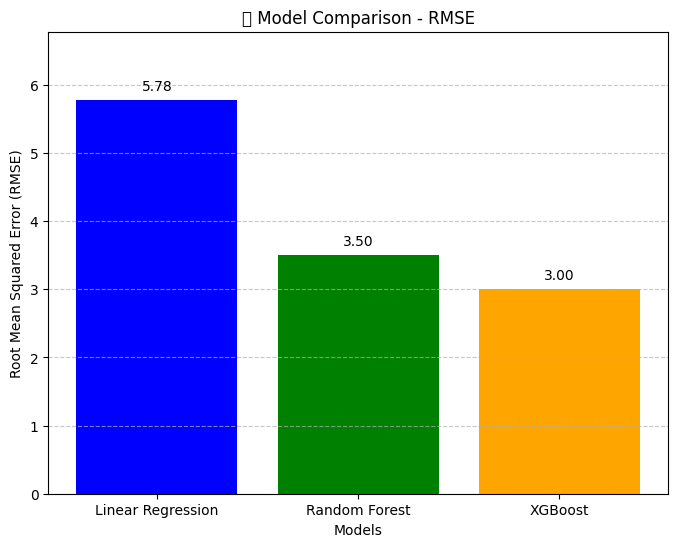

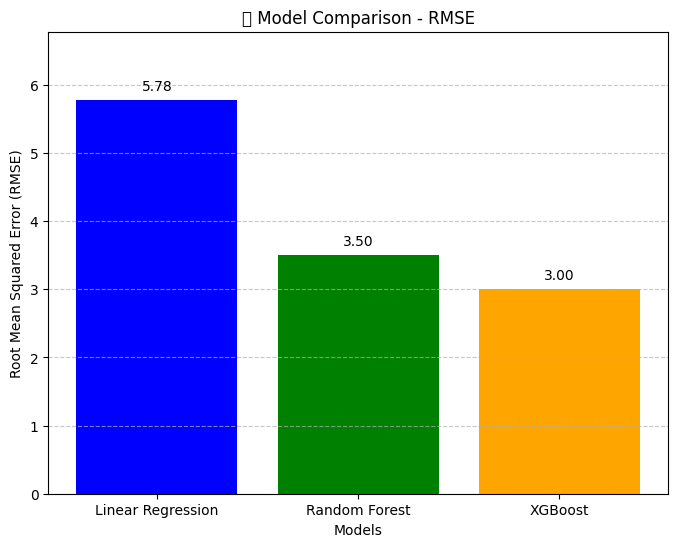

In [28]:
# Model Names
models = ['Linear Regression', 'Random Forest', 'XGBoost']

# Their RMSE values (put your actual values)
rmse_scores = [5.78, 3.50, 3.00]

# Plot
plt.figure(figsize=(8,6))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('📈 Model Comparison - RMSE')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores)+1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(rmse_scores):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

# Plot
plt.figure(figsize=(8,6))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title('📈 Model Comparison - RMSE')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores)+1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(rmse_scores):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

### 🏆 Final Conclusion

In this project, we compared three different regression models on the Boston Housing dataset: Linear Regression, Random Forest, and XGBoost.

- **Linear Regression** provided a simple baseline but was limited in capturing complex, non-linear relationships.
- **Random Forest** significantly improved performance by combining multiple decision trees and reducing variance.
- **XGBoost**, after careful hyperparameter tuning, achieved the best results by sequentially minimizing errors through boosting.

With an RMSE of approximately **3.00** and an R² Score of **0.87**, XGBoost demonstrated superior predictive capability, making it the most suitable model for this task.

This project highlights the importance of model selection, hyperparameter tuning, and the power of ensemble learning techniques like boosting.

